## Impact of lockdown on surface traffic

### Sources of data

We developed a class Traffic, which imports the data, presents it in a graphical form and performed regression allowing to better understand impact of different phases of lockdown on change in traffic and CO2 emissions. We investigated the change in different modes of transport during lockdown available at https://www.gov.uk/government/statistics/transport-use-during-the-coronavirus-covid-19-pandemic. The dataset include the relative change in traffic volume based on around 275 automatic traffic count sites across Great Britain. The raw data are displayed with plot_transport_data() method.

In [2]:
from transport.Transport import Traffic

traffic = Traffic()
traffic.plot_transport_data()

TypeError: __init__() missing 2 required positional arguments: 'transport_file' and 'weather_file'

### CO2 emissions

The drop in traffic volume decreased the emission of CO2. The average emission for different modes of transport in 2019 are available at https://www.gov.uk/government/statistical-data-sets/energy-and-environment-data-tables-env. We used this data set to estimate the CO2 emissions during the lockdown, by assuming that the emissions are proportional to traffic volume. Method plot_CO2_emissions() presents the results.

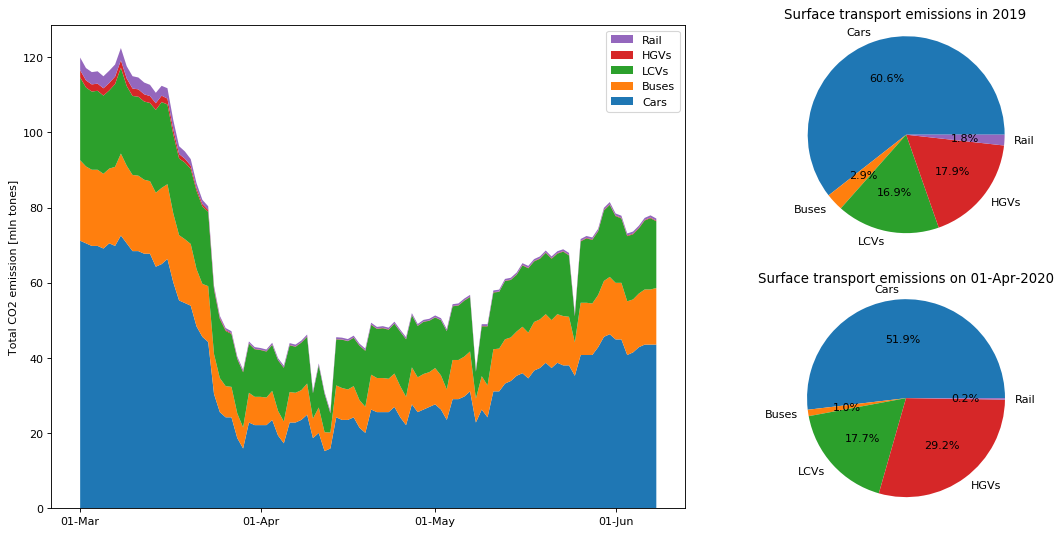

In [4]:
traffic.plot_CO2_emissions()

Clearlt the lockdown allowed to reduce CO2 emission almost threefold. As the traffic transport is responsible to 33% of net domestic emissions from all sources (data from 2019) this drop corresponds to approximately 20% drop in total UK emissions. Although traffic dropped for all forms of motorised transport the drop is mostly caused by the drop in car traffic volume. The mass transport (buses and rail) experienced the highest drop, but it does not contribute significantly to net CO2 emissions. As the lockdown proceeded and was easened the pollution started to gradually increase. To better understand these changes we quantify this process using interrupted linear model for describing change in traffic volume.

### Interrupted linear model

Interrupted linear model fits a linear model to a given time series, which may experience sudden drops and changes of gradient cause by point events. The events that we analysed include:
1) call for self-quarantine of people with fever or new cough (representing the beginning of COVID-19 restrictions),
2) national-wide partial lockdown,
3) ...

The interrupted model has form:

\begin{align}
y(t) = a_0 + b_0 t + \sum_{i=1}^N a_i x_i + \sum_{i=1}^N b_i x_i t + \epsilon(t),
\end{align}

where $y(t)$ is relative traffic volume on day $t$, $a_i$ and $b_i$ are model parameters, $\epsilon(t)$ is an error term. $x_i$ is a binary variable representing whether given event has already happened, i.e.:

\begin{align}
x_i = \begin{cases} 
x_i = 0 &\mbox{if } t < t_i \\
1 & \mbox{if } t \geq t_i \end{cases}.
\end{align}

Parameters $a_i$ represent the immediate effect of given event on the traffic, while $b_i$ represent the daily effect of given event on traffic volume. The parameters are fitted to the data using ordinary least square (OLS) model using run_interrupted_LM method.

The results are presented in two ways. Firstly, the fitted model is compared with the raw data, allowing to visually observe the immidiate and dialy effects of each regulation. Secondy, the confidence intervals for each immidiate and daily effect are presented using errorbars. They allow to determine whether the fitted effect is significant. The class also produces a diagnostics graphs for each mode of transport, which are saved by default in Transport/Model_diagnostics directory. Their inspection confirms the quality of our model for all modes of transport except bikes, for which separate model is constructed later.

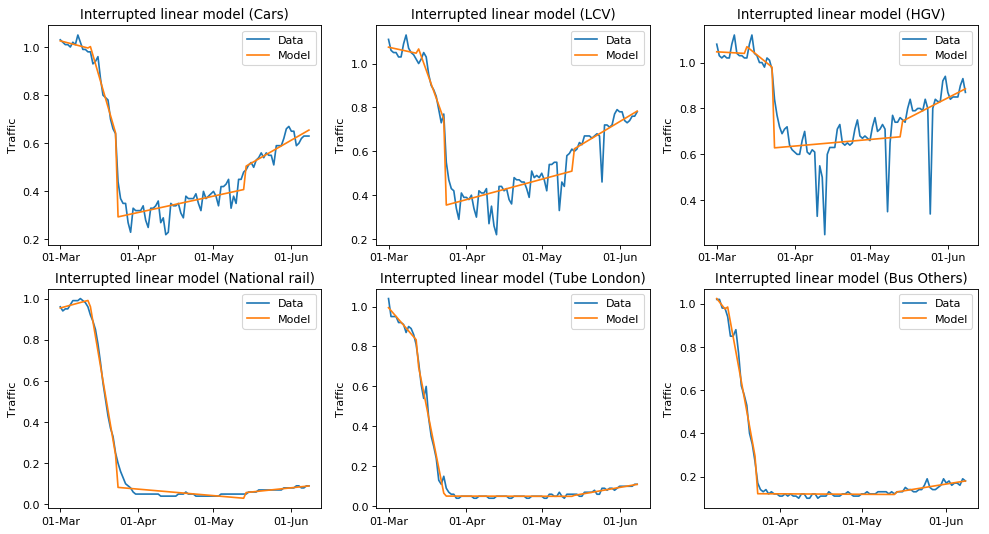

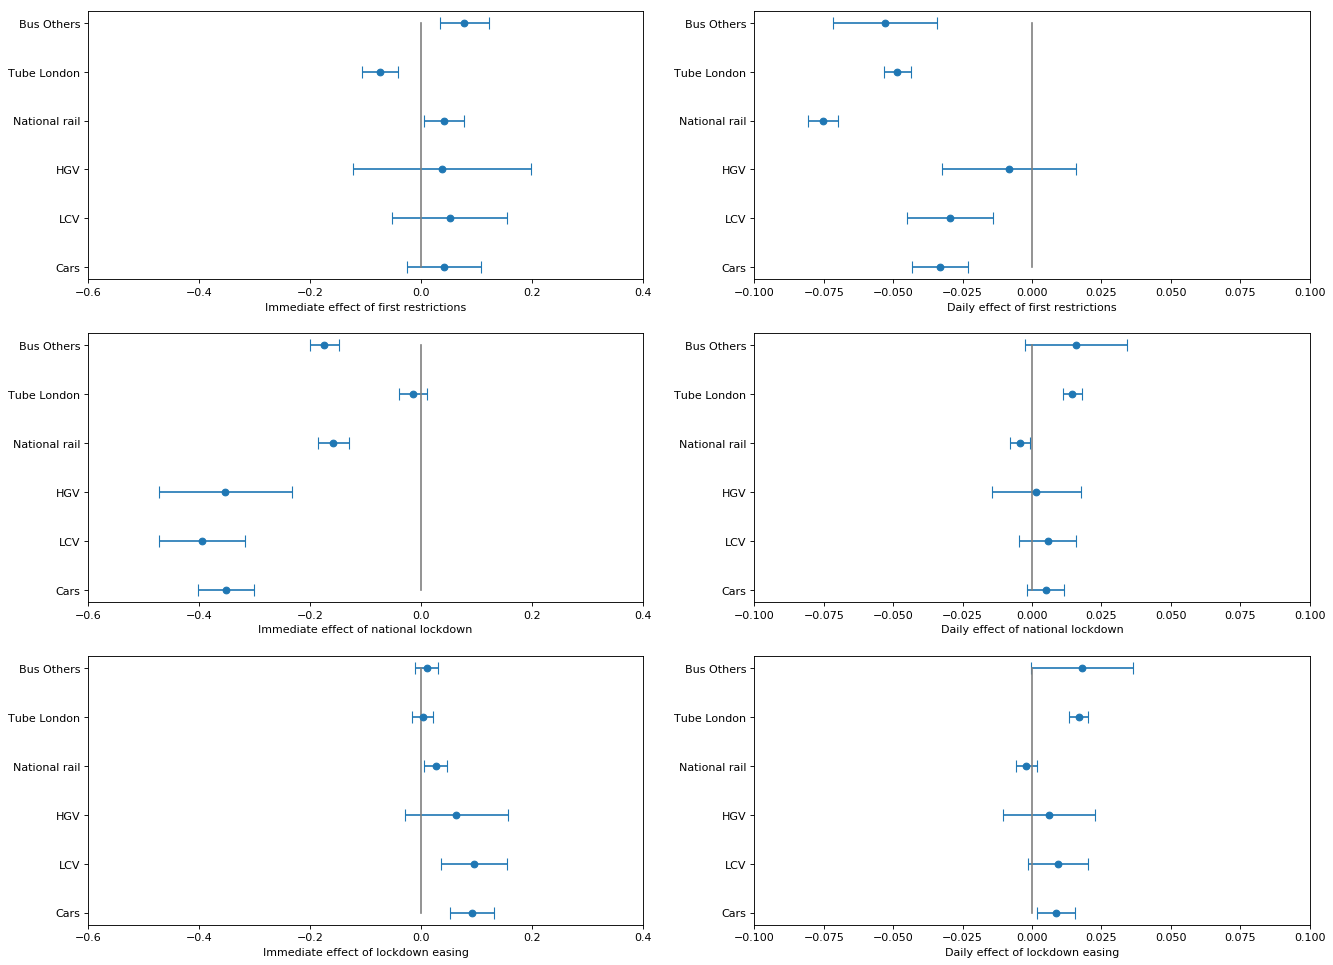

In [6]:
vehicle_types = ['Cars', 'LCV', 'HGV', 'National_rail', 'Tube_London', 'Bus_Others']
traffic.run_interrupted_LM(vehicle_types)

The first conclusion from the graphs is that initial lockdown restrictions caused mostly graduate effect reducing the traffic by similar amount each day. These period affected mostly mass transport, initially increasing the bus and rail traffic (as people started to go back home before lockdown) but then decreasing its volume each day significantly. The largest drop in surface transport happened after announcing national-wide lockdown. The lockdown reduce the car, LCV and HGV traffic by approximately 40% of average traffic volume. After during lockdown these modes of transport started to slowly return to normal, while mass transport stayed at very low levels. The easying of restrictions slightly increase the daily increment in traffic volume.

The only mode of transport which experienced an increment in its traffic are bikes, however the above interrupted linear model did not successfully predict its variation. To improve predictions we apply two modifications of the original model. Firstly, we include a maximum temperature on given day (relative an to average temperature on given month) as an additional linear term. Secondly, we introduced random linear effects correspoding to different week days, as we observed high correlation of bike traffic during the weekends. The model is performed using run_mixed_LM_for_bikes method.

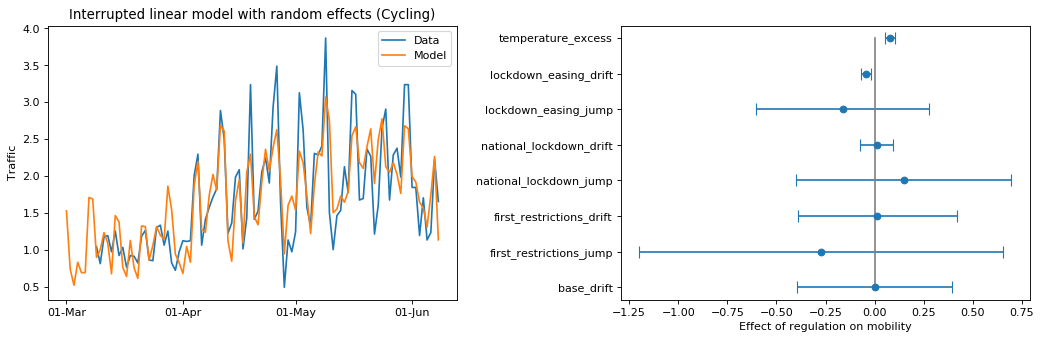

In [7]:
traffic.run_mixed_LM_for_bikes()

This model much better explains the variation of bike traffic. Suprisingly introducing the temperature cause it to be dominating factor explaining the variation in data. Although we observe higher number of cyclists during the lockdown, the effect of each phase separately is not significant within 95% confidence intervals. Only we observe a reduction of bike traffic in the lockdown easing period, but it may be caused by the fact that this was rainy period in UK.